In [30]:
# 1. UNZIP THE DATASET USING APPROPRIATE FUNCTIONS AND RENAME IT TO "NETFLIX_SHOWS"_MOVIES".

import zipfile
import os

# Import the dataset
zip_filename = 'netflix_data.csv.zip'

# Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('.')

# Rename the extracted file to "Netflix_shows_movies.csv" 
for file in os.listdir('.'):
    if file.endswith('.csv'):  
        os.rename(file, 'Netflix_shows_movies.csv')
        print('Dataset unzipped and renamed successfully to Netflix_shows_movies.csv')
        break

Dataset unzipped and renamed successfully to Netflix_shows_movies.csv


In [34]:
# DATA CLEANING

#2. ADDRESS MISSING VALUES IN THE DATASET.

import pandas as pd
import numpy as np

# Load the dataset
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Netflix_shows_movies.csv')

# Display the first few rows of the DataFrame
print(df.head())

#  Overview of missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_table = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_pct.round(2)
})
print(missing_table[missing_table["Missing Count"] > 0])


# Drop columns that are >80% missing (optional) ----
high_missing_cols = missing_table[
    missing_table["Missing %"] > 80
].index.tolist()

if high_missing_cols:
    print(f"\nDropping columns with >80% missing data: {high_missing_cols}")
    df.drop(columns=high_missing_cols, inplace=True)

# Specific handling per column

#  director – many missing; fill with "Unknown"
if "director" in df.columns:
    df["director"] = df["director"].fillna("Unknown")

#  cast – many missing; fill with "Unknown"
if "cast" in df.columns:
    df["cast"] = df["cast"].fillna("Unknown")

#  country – fill with mode (most frequent country)
if "country" in df.columns:
    mode_country = df["country"].mode()[0] if not df["country"].mode().empty else "Unknown"
    df["country"] = df["country"].fillna(mode_country)

#  date_added – parse to datetime, then forward-fill within same title (rare)
if "date_added" in df.columns:
    df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
    df["date_added"] = df["date_added"].fillna(method="ffill")

#  rating – fill with mode
if "rating" in df.columns:
    mode_rating = df["rating"].mode()[0] if not df["rating"].mode().empty else "Unknown"
    df["rating"] = df["rating"].fillna(mode_rating)

#  duration – should never be missing; drop rows if missing
if "duration" in df.columns:
    df = df.dropna(subset=["duration"])

#  Any remaining numeric column (e.g., release_year) – fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# assign the cleaned data a name

netflix_clean = df.copy()
print(f"\nCleaned shape: {netflix_clean.shape}")

print("\nMissing values after cleaning:")
print(netflix_clean.isnull().sum().sum(), "missing values remain.")

# 5. Save cleaned dataset
clean_csv_path = "Netflix_shows_movies_clean.csv"
netflix_clean.to_csv(clean_csv_path, index=False)
print(f"\nClean dataset saved to: {clean_csv_path}")

df.info()


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

/var/folders/zc/y1n214qd35l7vm1cy3tsf8j40000gn/T/ipykernel_18975/4135111889.py:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["date_added"] = df["date_added"].fillna(method="ffill")


In [38]:
#3. DATA EXPLORATION
#PERFORM VARIOUS DATA EXPLORATION TASKS, INCLUDING DESCRIBING THE DATA AND CONDUCTING STATISTICAL ANALYSIS.


# A. Top most watched genre
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Netflix_shows_movies.csv')

print("="*60)
print("1. MOST WATCHED GENRES (Top 10)")
print("="*60)

# Split genres (comma-separated) and explode into one row per genre
df_genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_genres = df_genres.to_frame(name='genre')

genre_counts = df_genres['genre'].value_counts().head(10)
print("Top 10 Genres:")
print(genre_counts)

1. MOST WATCHED GENRES (Top 10)
Top 10 Genres:
genre
International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
TV Dramas                  599
Action & Adventure         597
Independent Movies         552
TV Comedies                436
Thrillers                  392
Name: count, dtype: int64


In [39]:
# B. The ratings of the movies

# Summary statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# For categorical data, find the count of unique values in key columns
print("\nCounts of Content Types:")
print(df['type'].value_counts())

print("\nTop 10 Most Frequent Ratings:")
print(df['rating'].value_counts().head(10))



Descriptive Statistics:
            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000

Counts of Content Types:
type
Movie      4265
TV Show    1969
Name: count, dtype: int64

Top 10 Most Frequent Ratings:
rating
TV-MA    2027
TV-14    1698
TV-PG     701
R         508
PG-13     286
NR        218
PG        184
TV-Y7     169
TV-G      149
TV-Y      143
Name: count, dtype: int64


In [41]:
# Calculate the percentage of movies vs. TV shows
content_counts = df['type'].value_counts()
movie_percentage = (content_counts['Movie'] / len(df)) * 100
tv_show_percentage = (content_counts['TV Show'] / len(df)) * 100

print(f"\nPercentage of Movies: {movie_percentage:.2f}%")
print(f"Percentage of TV Shows: {tv_show_percentage:.2f}%")



Percentage of Movies: 68.42%
Percentage of TV Shows: 31.58%


In [42]:
# C. The Country with the highest number of content production on Netflix

import pandas as pd

# Load the dataset
df = pd.read_csv("Netflix_shows_movies_clean.csv")
print(f"Dataset loaded: {df.shape[0]:,} titles\n")

# Extract the first (primary) country from the 'country' column
#    (Handles comma-separated values, e.g., "United States, Canada" -> "United States")
df['first_country'] = df['country'].str.split(',').str[0].str.strip()

# 3. Identify the top 10 countries by content production
top_countries = df['first_country'].value_counts().head(10)
print("\nTop 10 Content Producing Countries:")
print(top_countries)

Dataset loaded: 6,234 titles


Top 10 Content Producing Countries:
first_country
United States     2778
India              808
United Kingdom     483
Canada             206
Japan              184
France             147
South Korea        146
Spain              139
Mexico              99
Australia           94
Name: count, dtype: int64


/var/folders/zc/y1n214qd35l7vm1cy3tsf8j40000gn/T/ipykernel_18975/890636510.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


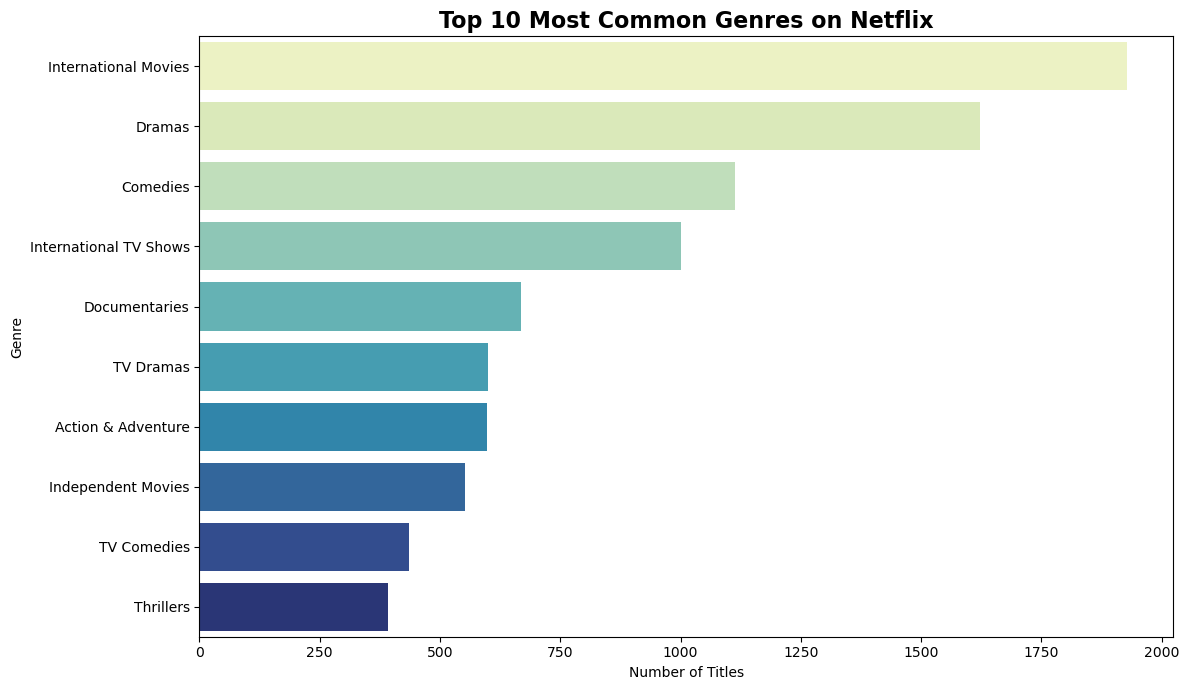

In [45]:
# 4. DATA VISUALIZATION
# DATA VISUALISATION FOR THE MOST WATCHED GENRE USING MATPLOTLIB/SEABORN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.figure(figsize=(12, 7))
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    palette='YlGnBu'
)
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16, weight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

/var/folders/zc/y1n214qd35l7vm1cy3tsf8j40000gn/T/ipykernel_18975/490375140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating',


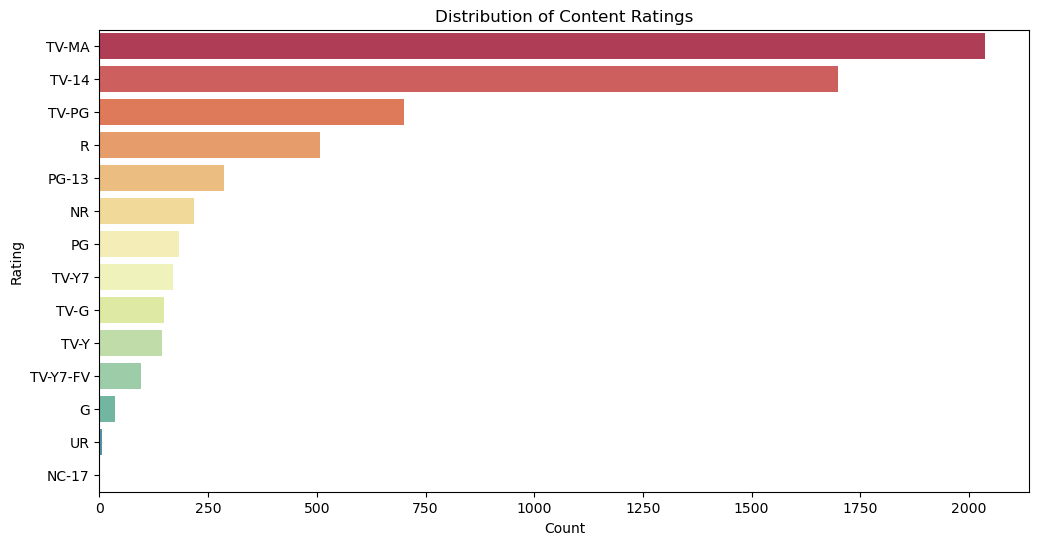

In [48]:
# DATA VISUALISATION FOR THE RATINGS DISTRIBUTION USING SEABORN/MATPLOTLIB

plt.figure(figsize=(12, 6))
sns.countplot(y='rating',
data=df,
order=df['rating'].value_counts().index,
palette='Spectral')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

Dataset loaded: 6,234 titles, 12 columns

RATINGS DISTRIBUTION
Rating Counts:
      rating  count
0      TV-MA   2037
1      TV-14   1698
2      TV-PG    701
3          R    508
4      PG-13    286
5         NR    218
6         PG    184
7      TV-Y7    169
8       TV-G    149
9       TV-Y    143
10  TV-Y7-FV     95
11         G     37
12        UR      7
13     NC-17      2


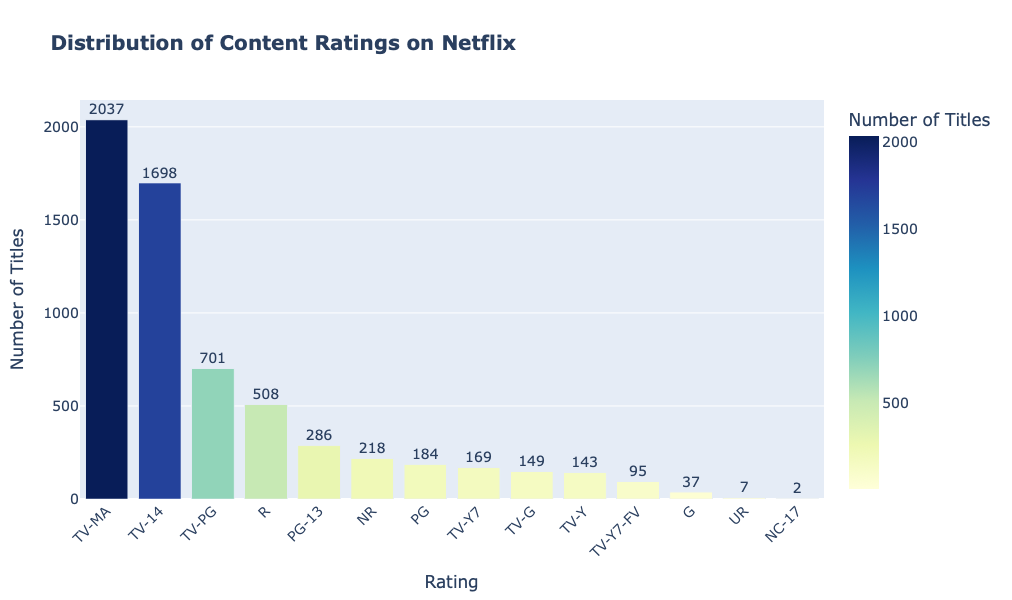


Interactive plot saved as 'Netflix_Ratings_Distribution_Plotly.html'


In [50]:
#  Netflix Visualizations: Ratings Distribution (using Plotly)

import pandas as pd
import plotly.express as px  # For interactive plots

df = pd.read_csv("Netflix_shows_movies_clean.csv")
print(f"Dataset loaded: {df.shape[0]:,} titles, {df.shape[1]} columns\n")

#  Ratings Distribution (Interactive with Plotly)

print("="*50)
print("RATINGS DISTRIBUTION")
print("="*50)

# Get rating counts and sort by frequency
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']
rating_counts = rating_counts.sort_values(by='count', ascending=False)

print("Rating Counts:")
print(rating_counts)

# Interactive bar chart with Plotly Express
fig = px.bar(
    rating_counts,
    x='rating',
    y='count',
    title='Distribution of Content Ratings on Netflix',
    labels={'rating': 'Rating', 'count': 'Number of Titles'},
    color='count',  # Color by count for visual appeal
    color_continuous_scale='YlGnBu',
    text='count'  # Show counts on bars
)

# Customize layout
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Number of Titles',
    xaxis_tickangle=-45,
    font=dict(size=14),
    title_font=dict(size=20, weight='bold'),
    height=600,
    width=1000
)

fig.update_traces(textposition='outside')  # Position text outside bars

# Show the plot 
fig.show()

# Save as interactive HTML
fig.write_html("Netflix_Ratings_Distribution_Plotly.html")
print("\nInteractive plot saved as 'Netflix_Ratings_Distribution_Plotly.html'")
